## Prediction using supervised ML

###### Import all Libraries



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


###### Read data

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

###### Display the data

In [4]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


###### Size of the data(columns,rows)

In [5]:
data.shape

(25, 2)

###### visualize the data

Scatter plot of Hours studied and score


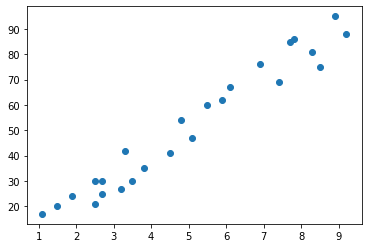

In [8]:
print("Scatter plot of Hours studied and score")
plt.scatter(data.Hours,data.Scores)

###### relation between them

In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


###### Preparing the data

In [10]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [13]:
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


##### splitting your dataset into taining and testing

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

##### Training the algorithm using sklearn

In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


##### Make predictions

In [16]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [25]:
print('Co-efficient of linear regression',regressor.coef_)

print('Intercept of linear regression model',regressor.intercept_)

Co-efficient of linear regression [9.91065648]
Intercept of linear regression model 2.018160041434683


In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


##### Vizualization

###### original observations in red and the regression line in green.

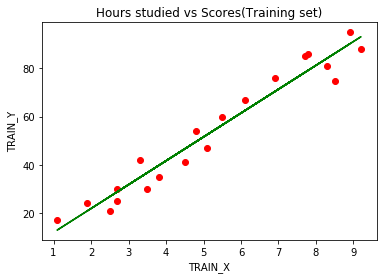

In [18]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train,regressor.predict(X_train), color = "green")
plt.title("Hours studied vs Scores(Training set)")
plt.xlabel('TRAIN_X')
plt.ylabel('TRAIN_Y')
plt.show()

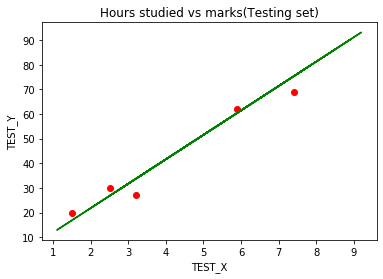

In [19]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train,regressor.predict(X_train), color = "green")
plt.title("Hours studied vs marks(Testing set)")
plt.xlabel('TEST_X')
plt.ylabel('TEST_Y')
plt.show()

##### test with your own data

In [20]:

hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


##### for 9.25 hours of study the predicted marks are 93.69

##### Evaluting the model

In [21]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
